In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions # Modified import
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16 # Modified import
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
import numpy as np

#  Define the image dimensions and batch size

In [2]:
img_height, img_width = 224, 224
batch_size = 32

# Define the directories containing your training, validation, and test data

In [3]:
train_data_dir = r"D:\Flower_dataset\Processed_data\train"
valid_data_dir = r"D:\Flower_dataset\Processed_data\val"
test_data_dir = r"D:\Flower_dataset\Processed_data\test"

# Create generator for train, val, test


In [4]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1554 images belonging to 5 classes.
Found 342 images belonging to 5 classes.


In [5]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,  # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 346 images belonging to 5 classes.


In [6]:
# 860 pic are in val folder 
validation_datagen = ImageDataGenerator(rescale=1./255)  # You may need to adjust this based on your preprocessing requirements

validation_generator = train_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 860 images belonging to 5 classes.


# Show shape

In [7]:
x, y = test_generator.next()
x.shape

(1, 224, 224, 3)

# Show class_indices , class_name

In [8]:
# Accessing class indices
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Accessing class names
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)


Class indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load VGG16 base model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have created train_generator with your augmented data
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)


Epoch 1/10
49/49 [==============================] - 280s 6s/step - loss: 1.5806 - accuracy: 0.7066 - val_loss: 0.8938 - val_accuracy: 0.8012
Epoch 2/10
49/49 [==============================] - 295s 6s/step - loss: 0.4458 - accuracy: 0.8739 - val_loss: 1.0270 - val_accuracy: 0.7924
Epoch 3/10
49/49 [==============================] - 293s 6s/step - loss: 0.3167 - accuracy: 0.9093 - val_loss: 0.8742 - val_accuracy: 0.7953
Epoch 4/10
49/49 [==============================] - 295s 6s/step - loss: 0.1982 - accuracy: 0.9376 - val_loss: 0.7373 - val_accuracy: 0.8187
Epoch 5/10
49/49 [==============================] - 303s 6s/step - loss: 0.1534 - accuracy: 0.9472 - val_loss: 0.7579 - val_accuracy: 0.8099
Epoch 6/10
49/49 [==============================] - 313s 6s/step - loss: 0.1028 - accuracy: 0.9614 - val_loss: 0.7213 - val_accuracy: 0.8304
Epoch 7/10
49/49 [==============================] - 308s 6s/step - loss: 0.0741 - accuracy: 0.9743 - val_loss: 0.6905 - val_accuracy: 0.8509
Epoch 8/10
49

# Show fig

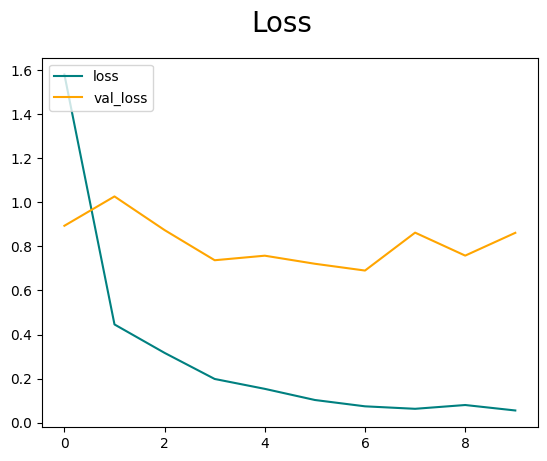

In [10]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

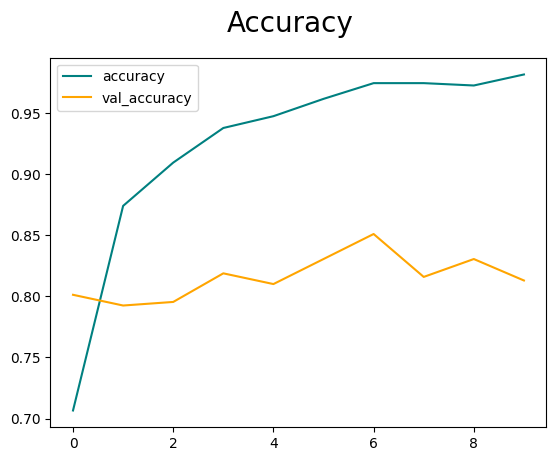

In [11]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Show: precision, recall, f1-score, support

# Save model

In [12]:
import pickle

# Define the full path to the folder where you want to save the file
folder_path = r'C:\Users\sangw\Project ADY\History of models\\'

# Save the history object using pickle
file_path = folder_path + 'VGG16_history.pkl'
with open(file_path, 'wb') as pkl_file:
    pickle.dump(history.history, pkl_file)

In [13]:
import os
from tensorflow.keras.models import save_model
model.save(os.path.join('models','VGG16.h5'))

C:\Users\sangw\anaconda3\envs\jupyter\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load model

In [14]:
import pickle
from tensorflow.keras.models import load_model

# Define the path to the saved history file
file_path = r'C:\Users\sangw\Project ADY\History of models\VGG16_history.pkl'

# Load the history object from the file
with open(file_path, 'rb') as pkl_file:
    loaded_history = pickle.load(pkl_file)

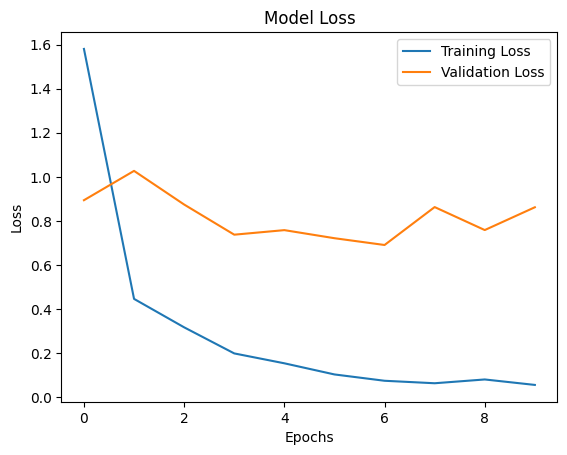

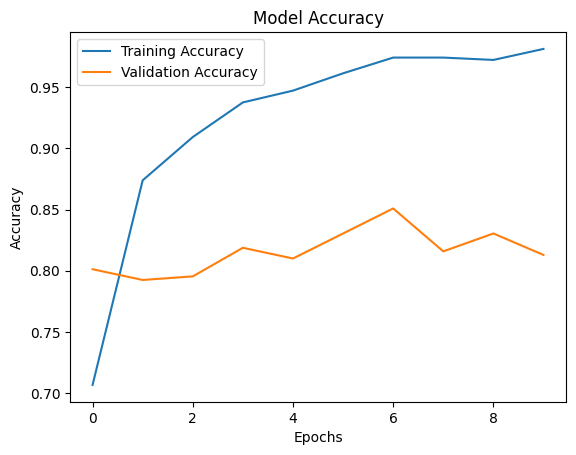

In [15]:
import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define the path to the saved history file
file_path = r'C:\Users\sangw\Project ADY\History of models\VGG16_history.pkl'

# Load the history object from the file
with open(file_path, 'rb') as pkl_file:
    loaded_history = pickle.load(pkl_file)

# Plot training and validation loss
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Evaluated

1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 170ms/step


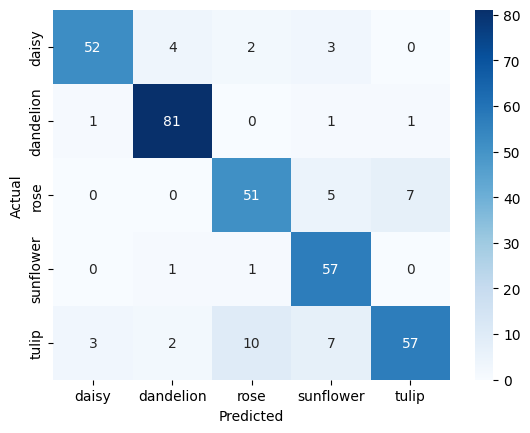

Test accuracy: 86.13%
              precision    recall  f1-score   support

       daisy       0.93      0.85      0.89        61
   dandelion       0.92      0.96      0.94        84
        rose       0.80      0.81      0.80        63
   sunflower       0.78      0.97      0.86        59
       tulip       0.88      0.72      0.79        79

    accuracy                           0.86       346
   macro avg       0.86      0.86      0.86       346
weighted avg       0.87      0.86      0.86       346



In [16]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load the trained model
model = load_model(os.path.join('models', 'VGG16.h5'))

# Assuming test_generator is already defined and filenames is defined
# Assuming train_generator.class_indices is defined

# Get the number of samples in the test set
nb_samples = len(test_generator)

# Initialize lists to store predicted probabilities and actual labels
y_prob = []
y_act = []

# Reset the test generator before iterating through it
test_generator.reset()

# Iterate through the test generator to get predictions and actual labels
for _ in range(nb_samples):
    X_test, Y_test = test_generator.next() 
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

# Convert predicted probabilities to class labels
predicted_class = [list(train_generator.class_indices.keys())[np.argmax(i)] for i in y_prob]

# Convert actual labels to class labels
actual_class = [list(train_generator.class_indices.keys())[np.argmax(i)] for i in y_act]

# Create a DataFrame to store predicted and actual classes
out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T,
                      columns=['predicted_class', 'actual_class'])

# Create a confusion matrix
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# Calculate precision, recall, and F1-score
# Use zero_division=0 to handle cases where precision and F-score are undefined
report = classification_report(out_df['actual_class'], out_df['predicted_class'], output_dict=True, zero_division=0)

# Plot the confusion matrix
sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()

# Calculate test accuracy
test_accuracy = np.diag(confusion_matrix).sum() / confusion_matrix.values.sum() * 100
print('Test accuracy: {:.2f}%'.format(test_accuracy))

# Print classification report
print(classification_report(out_df['actual_class'], out_df['predicted_class'], zero_division=0))

